# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#**Load the Dataset**

In [ ]:
titanic = pd.read_csv('/content/tested.csv')

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
titanic.shape

(418, 12)

#**EDA**

<Axes: >

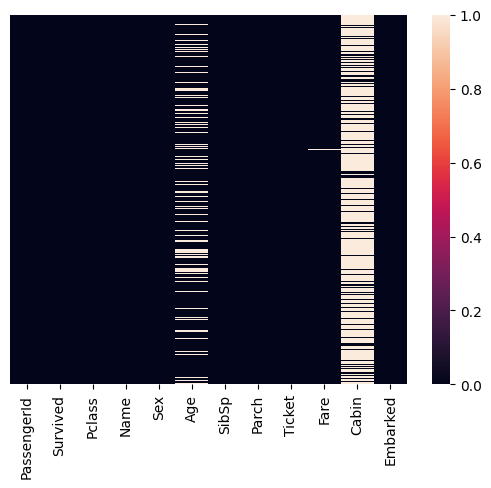

In [ ]:
#Check null/misssing data
sns.heatmap(titanic.isnull(), yticklabels = False)

<Axes: xlabel='Survived', ylabel='count'>

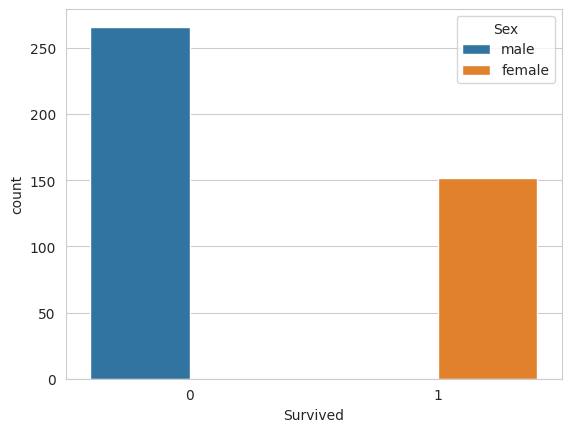

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x='Survived', hue = 'Sex', data = titanic)

<Axes: xlabel='Age', ylabel='Count'>

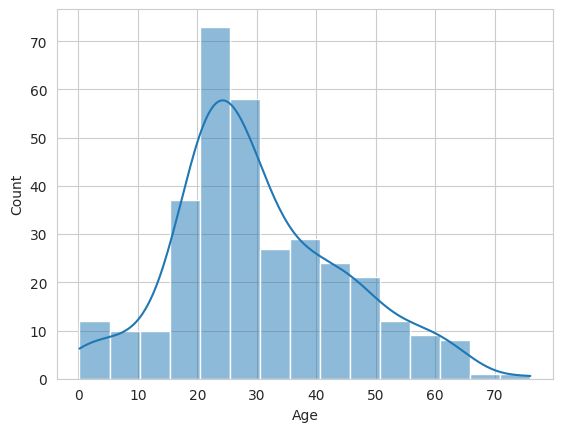

In [ ]:
sns.histplot(titanic['Age'].dropna(), kde = True)

<Axes: xlabel='SibSp', ylabel='count'>

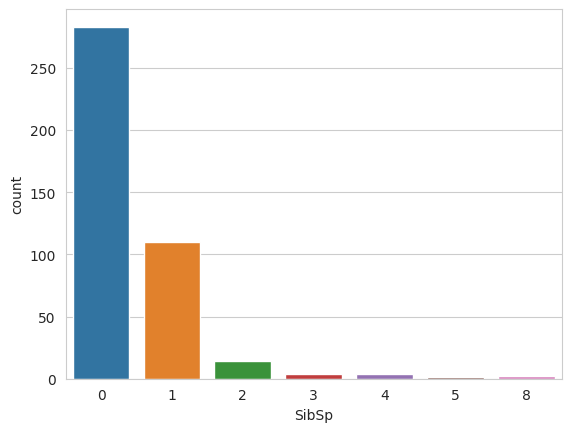

In [ ]:
sns.countplot(x='SibSp', data = titanic)

<Axes: >

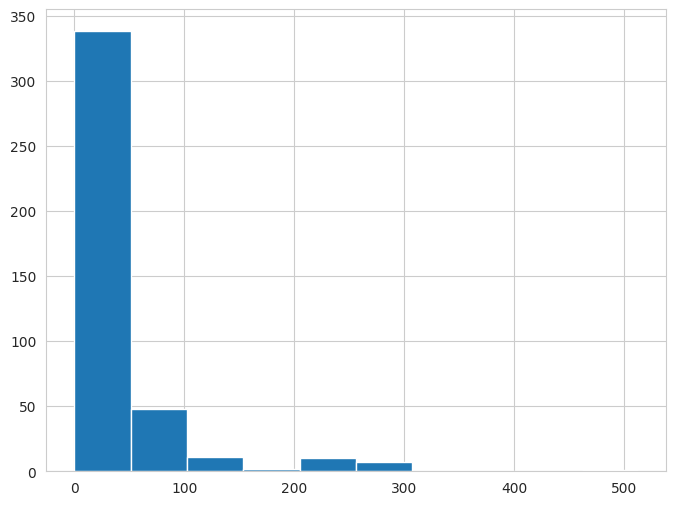

In [ ]:
titanic['Fare'].hist(figsize = (8,6))

#**Data Cleaning**

<Axes: xlabel='Pclass', ylabel='Age'>

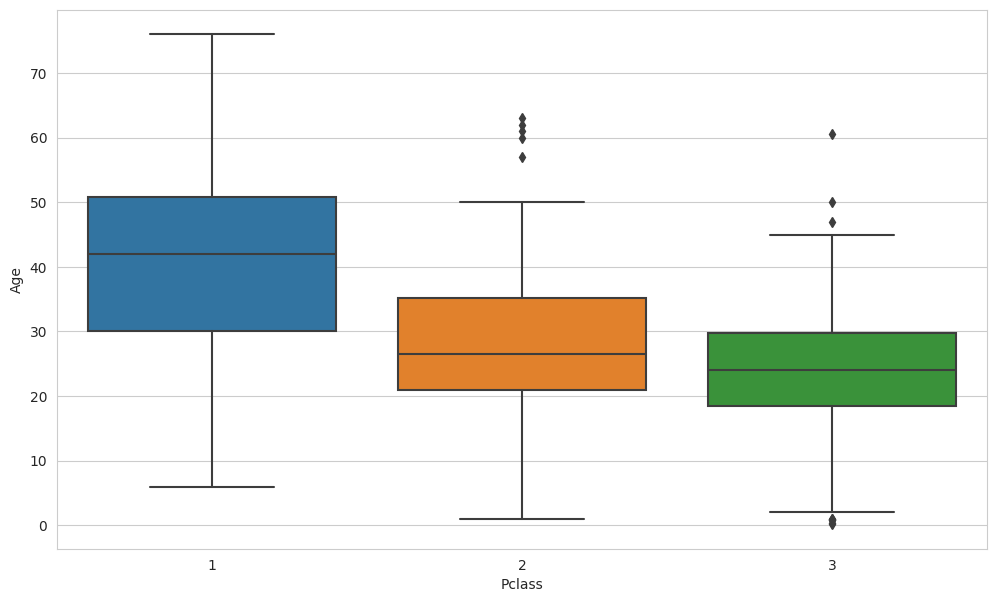

In [ ]:
plt.figure(figsize = (12,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic)

In [ ]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 40
    elif Pclass == 2:
      return 29
  else:
    return Age

In [ ]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age, axis = 1)

<Axes: >

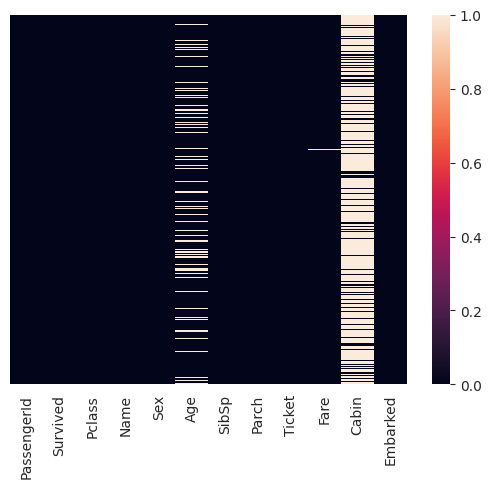

In [ ]:
sns.heatmap(titanic.isnull(), yticklabels = False)

In [ ]:
titanic.drop("Cabin", axis = 1, inplace = True)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,C


In [ ]:
titanic.dropna(inplace = True)

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 415
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  345 non-null    int64  
 1   Survived     345 non-null    int64  
 2   Pclass       345 non-null    int64  
 3   Name         345 non-null    object 
 4   Sex          345 non-null    object 
 5   Age          345 non-null    float64
 6   SibSp        345 non-null    int64  
 7   Parch        345 non-null    int64  
 8   Ticket       345 non-null    object 
 9   Fare         345 non-null    float64
 10  Embarked     345 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 32.3+ KB


#**Feature Transform**

In [ ]:
sex = pd.get_dummies(titanic['Sex'], drop_first=True)
embark = pd.get_dummies(titanic['Embarked'], drop_first = True)

In [ ]:
titanic.drop(['Name','Sex','Ticket','Embarked'],axis = 1, inplace = True)

In [ ]:
titanic = pd.concat([titanic, sex, embark], axis = 1)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,0,3,34.5,0,0,7.8292,1,1,0
1,893,1,3,47.0,1,0,7.0000,0,0,1
2,894,0,2,62.0,0,0,9.6875,1,1,0
3,895,0,3,27.0,0,0,8.6625,1,0,1
4,896,1,3,22.0,1,1,12.2875,0,0,1


#**Build LR Model**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(titanic.drop('Survived', axis = 1), titanic['Survived'], test_size = .30 )

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
prediction = logmodel.predict(X_test)

#**Evaluate**

In [ ]:
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        42

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104

